In [1]:
include("LiPoSID.jl")
using Plots
Plots.plotlyjs()

using QuantumOptics
basis = NLevelBasis(2)

WebIO._IJuliaInit()

NLevel(N=2)

In [2]:
function xyz(b)
    x = b[1, :]
    y = b[2, :]
    z = b[3, :]
    return x,y,z
end

xyz (generic function with 1 method)

In [3]:
γ = "0.079477"

"0.079477"

In [4]:
using HDF5

In [5]:
function get_by_name(file_name, gamma, operator_name)
    h5open(file_name,"r") do fid # read file, preserve existing contents
        operator = read(fid["gamma_"*gamma][operator_name])
        return(operator)
    end
end


get_by_name (generic function with 1 method)

In [13]:
ρ, t = LiPoSID.get_rho_series("DATA/State_B3_2CUT_data.h5", γ)
b = LiPoSID.bloch(ρ)
t_steps = length(ρ)
t = convert(Vector{Float64}, t)
ρ₀ = DenseOperator(basis,ρ[1])

dir = "/home/zah/POP23/MODELS/"

models_file = "POP_NoRmLME_trn4_gap_fix-Phi-up_2023-Aug-07_at_16-29.h5"


A = get_by_name(dir*models_file, γ, "A_sid_exact")
H = get_by_name(dir*models_file, γ, "H_sid_exact")


tᵖᵒᵖ, ρᵖᵒᵖ = timeevolution.master(t, ρ₀, DenseOperator(basis,H), [DenseOperator(basis,A)])
ρᵖᵒᵖ = [convert(Matrix{ComplexF64}, ρᵢ.data) for ρᵢ in ρᵖᵒᵖ]
bᵖᵒᵖ = LiPoSID.bloch(ρᵖᵒᵖ);


models_file = "POP_RmLME_trn4_gap_fix-Phi-up_2023-Aug-07_at_19-32.h5"

Aᴿᴹ = get_by_name(dir*models_file, γ, "A_sid_exact")
Hᴿᴹ = get_by_name(dir*models_file, γ, "H_sid_exact")

tᴿᴹ, ρᴿᴹ = timeevolution.master(t, ρ₀, DenseOperator(basis,Hᴿᴹ), [DenseOperator(basis,Aᴿᴹ)])
ρᴿᴹ = [convert(Matrix{ComplexF64}, ρᵢ.data) for ρᵢ in ρᴿᴹ];
bᴿᴹ = LiPoSID.bloch(ρᴿᴹ);

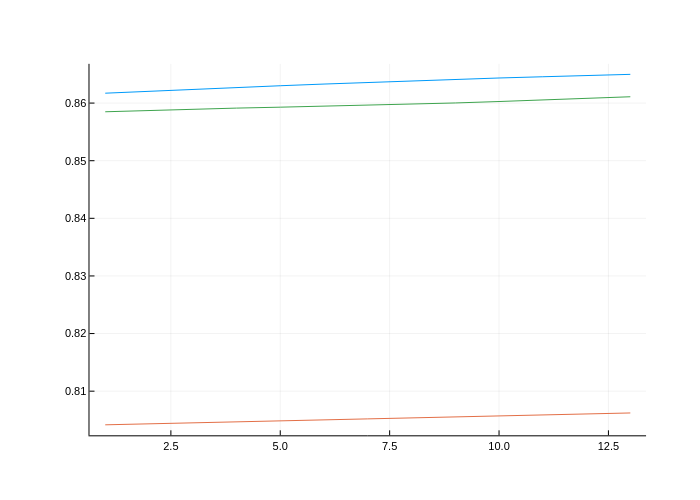

In [14]:
psb1 = plot(b'[1244:end,1], label = "", title="Spin-boson")
psb1 = plot!(bᵖᵒᵖ'[1244:end,1], label = "")
psb1 = plot!(bᴿᴹ'[1244:end,1], label = "")
#savefig(psb1, "Bloch1_spin-boson.pdf")
psb2 = plot(b'[1244:end,2], label = "")
psb2 = plot!(bᵖᵒᵖ'[1244:end,2], label = "")
psb2 = plot!(bᴿᴹ'[1244:end,2], label = "")
#savefig(psb2, "Bloch2_spin-boson.pdf")
psb3 = plot(b'[1244:end,3], label = "")
psb3 = plot!(bᵖᵒᵖ'[1244:end,3], label = "")
psb3 = plot!(bᴿᴹ'[1244:end,3], label = "")
#savefig(psb3, "Bloch3_spin-boson.pdf")

In [15]:
dir = "/home/zah/POP23/MODELS/"

models_file = "POP_NoRmLME_trn4_gap_fix-Phi-up_2023-Aug-07_at_16-29.h5"


A = get_by_name(dir*models_file, γ, "A_lme")
H = get_by_name(dir*models_file, γ, "H_lme")


tᴸᴹᴱ, ρᴸᴹᴱ = timeevolution.master(t, ρ₀, DenseOperator(basis,H), [DenseOperator(basis,A)])
ρᴸᴹᴱ = [convert(Matrix{ComplexF64}, ρᵢ.data) for ρᵢ in ρᴸᴹᴱ]
bᴸᴹᴱ = LiPoSID.bloch(ρᴸᴹᴱ);

dir = "/home/zah/POP23/MODELS/"

models_file = "POP_NoRmLME_trn4_gap_fix-Phi-up_2023-Aug-07_at_16-29.h5"


A = get_by_name(dir*models_file, γ, "A_sid_lme")
H = get_by_name(dir*models_file, γ, "H_sid_lme")


tᵖᵒᵖ, ρᵖᵒᵖ = timeevolution.master(t, ρ₀, DenseOperator(basis,H), [DenseOperator(basis,A)])
ρᵖᵒᵖ = [convert(Matrix{ComplexF64}, ρᵢ.data) for ρᵢ in ρᵖᵒᵖ]
bᵖᵒᵖ = LiPoSID.bloch(ρᵖᵒᵖ);

models_file = "POP_RmLME_trn4_gap_fix-Phi-up_2023-Aug-07_at_19-32.h5"

Aᴿᴹ = get_by_name(dir*models_file, γ, "A_sid_lme")
Hᴿᴹ = get_by_name(dir*models_file, γ, "H_sid_lme")

tᴿᴹ, ρᴿᴹ = timeevolution.master(t, ρ₀, DenseOperator(basis,Hᴿᴹ), [DenseOperator(basis,Aᴿᴹ)])
ρᴿᴹ = [convert(Matrix{ComplexF64}, ρᵢ.data) for ρᵢ in ρᴿᴹ];
bᴿᴹ = LiPoSID.bloch(ρᴿᴹ);

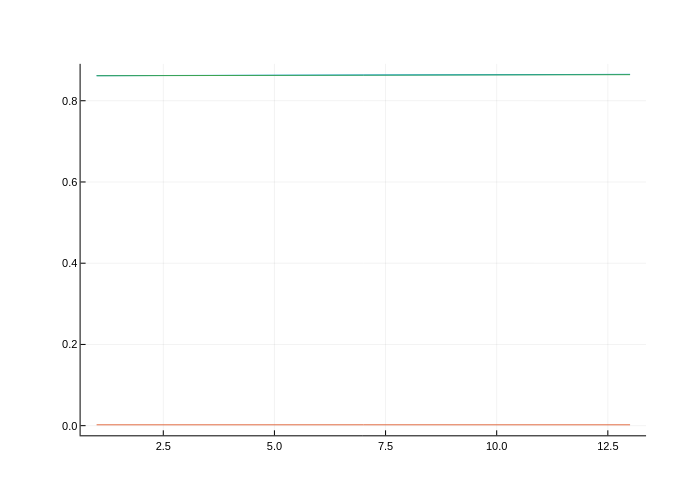

In [19]:
p1 = plot(b'[1244:end,1], label = "exact", title="LME")
p1 = plot!(bᵖᵒᵖ'[1244:end,1], label = "POP (all coefs)")
p1 = plot!(bᴿᴹ'[1244:end,1], label = "POP (small coefs removed)")
#savefig(psb1, "Bloch1_spin-boson.pdf")
p2 = plot(b'[1244:end,2], label = "")
p2 = plot!(bᵖᵒᵖ'[1244:end,2], label = "")
p2 = plot!(bᴿᴹ'[1244:end,2], label = "")
#savefig(psb2, "Bloch2_spin-boson.pdf")
p3 = plot(b'[1244:end,3], label = "")
p3 = plot!(bᵖᵒᵖ'[1244:end,3], label = "")
p3 = plot!(bᴿᴹ'[1244:end,3], label = "")
#savefig(psb3, "Bloch3_spin-boson.pdf")

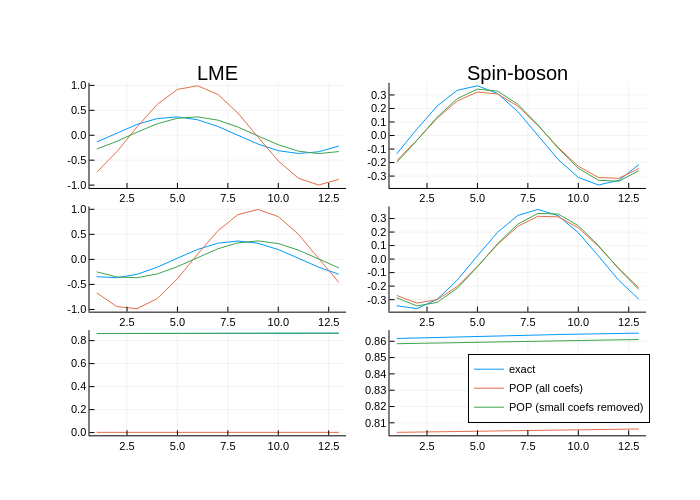

In [20]:
plt = plot(p1, psb1, p2, psb2, p3, psb3, layout = (3,2), legend = :bottomright)

In [21]:
savefig(plt, "Bloch_smallest_gamma.pdf")

"/home/zah/POP23/Bloch_smallest_gamma.pdf"

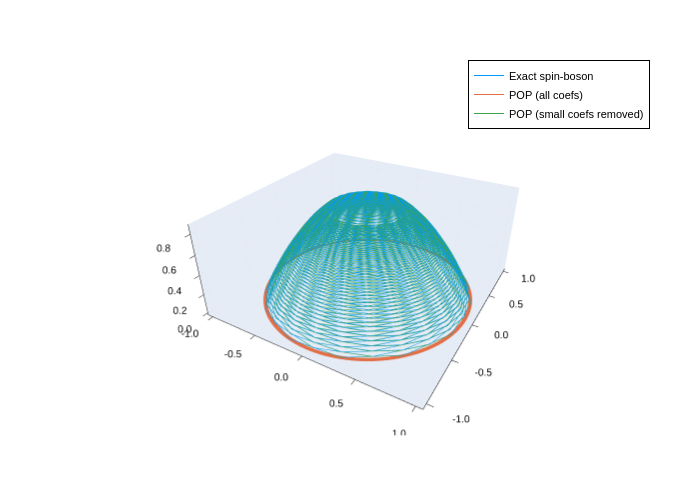

In [11]:
plt = Plots.plot(xyz(b), label = "Exact spin-boson")
plt = Plots.plot!(xyz(bᵖᵒᵖ), label = "POP (all coefs)")
plt = Plots.plot!(xyz(bᴿᴹ), label = "POP (small coefs removed)")